# Example 4: Role of the IMF in the magnitude distribution

## 4.1 Apparent magnitudes

In **Example3** we tested the effects of the IMF selection in the distribution of the G band. Here, we can repeat the plots for other bands.

In [1]:
import numpy as np
import AsgaiaTools
import matplotlib.pyplot as plt

In [2]:
# Histogram options (feel free to edit them as you want):
Band = 'U'; # For example, the H-band
Nbins = 64;
band_limits = [12., 20.];

In [3]:
# Name of the file of the particles
filename = 'Particle_list.dat';

In [4]:
# Read the file
A = np.genfromtxt(filename, comments='#',names=True);

In [5]:
#Extract the data
lon = A['lon_rad'];
lat = A['lat_rad'];
dkpc = A['dist_kpc'];
metZ = A['met_Z'];
logAge = A['logAge_yrs'];
mass = A['mass_Msun'];
del(A);

Now we make use of the function **AsgaiaTools.GetMagnitude_hist()**, which returns three outputs:

1. The histogram of the apparent magnitude in the given band.
2. The number of observed stars.
3. The mass fraction of the particle which has converted into observable stars

In this exercise, we are only interested in the first output.

In [6]:
# First, use the Salpeter IMF:
im_hist_S = AsgaiaTools.GetMagnitude_hist(lon, lat, dkpc, metZ, logAge, mass, Nbins=Nbins, IMF_type='s', \
                                     band=Band, mag_min=band_limits[0], mag_max=band_limits[1])[0];

In [7]:
# Second, use the Kroupa IMF:
im_hist_K = AsgaiaTools.GetMagnitude_hist(lon, lat, dkpc, metZ, logAge, mass, Nbins=Nbins, IMF_type='k', \
                                     band=Band, mag_min=band_limits[0], mag_max=band_limits[1])[0];

In [8]:
# Third, use the Bimodal IMF:
im_hist_B = AsgaiaTools.GetMagnitude_hist(lon, lat, dkpc, metZ, logAge, mass, Nbins=Nbins, IMF_type='b', \
                                     band=Band, mag_min=band_limits[0], mag_max=band_limits[1])[0];

In [9]:
# The x-axis of the histograms is not created by AsgaiaTools:
band_axis = np.linspace(band_limits[0], band_limits[1],Nbins,endpoint = False);
width = band_axis[1]-band_axis[0];

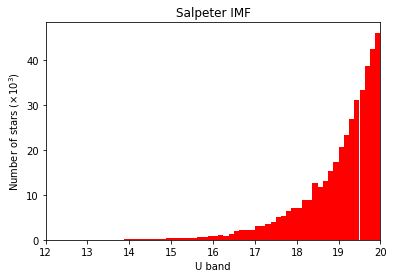

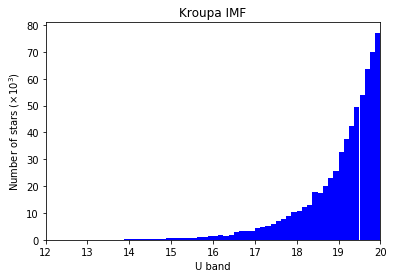

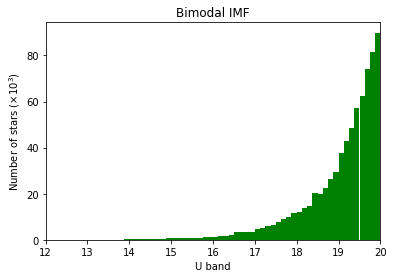

In [10]:
# First the Salpeter IMF
plt.figure(Band+' band histograms (Salpeter)');
plt.title('Salpeter IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(band_axis,im_hist_S*1E-3, width = width,fc = 'r', align='edge');
plt.xlim(band_limits);
plt.show()

# Second the Kroupa IMF
plt.figure(Band+' band histograms (Kroupa)');
plt.title('Kroupa IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(band_axis,im_hist_K*1E-3, width = width,fc = 'b', align='edge');
plt.xlim(band_limits);
plt.show()

# Third the Bimodal IMF
plt.figure(Band+' band histograms (Bimodal)');
plt.title('Bimodal IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(band_axis,im_hist_B*1E-3, width = width,fc = 'g', align='edge');
plt.xlim(band_limits);
plt.show()

In [11]:
#Now we compare the three distributions

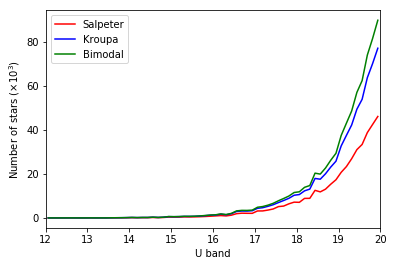

In [12]:
# Comparison
band_axis = band_axis + 0.5*width;
plt.figure('Comparison of the '+Band+' band histograms');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.plot(band_axis,im_hist_S*1E-3,'r');
plt.plot(band_axis,im_hist_K*1E-3,'b');
plt.plot(band_axis,im_hist_B*1E-3,'g');
plt.xlim(band_limits);
plt.legend(('Salpeter','Kroupa','Bimodal'));
plt.show()

## 4.2 Absolute magnitudes

For the absolute magnitudes, just omit the references to the position in the **AsgaiaTools.GetMagnitude_hist()** function.

### <span style="color:red">Remember!</span> 
Now there are not extinction or distance effects. We must redefine the band range:

In [13]:
Abs_band_limits = [0.,0.];
Abs_band_limits[0] = band_limits[0]-5*np.log10(np.mean(dkpc))-10.;
Abs_band_limits[1] = band_limits[1]-5*np.log10(np.mean(dkpc))-10.;

In [14]:
# First, use the Salpeter IMF:
im_hist_S = AsgaiaTools.GetMagnitude_hist( metZ, logAge, mass, Nbins=Nbins, IMF_type='s', \
                                     band=Band, mag_min=Abs_band_limits[0], mag_max=Abs_band_limits[1])[0];

# First, use the Kroupa IMF:
im_hist_K = AsgaiaTools.GetMagnitude_hist( metZ, logAge, mass, Nbins=Nbins, IMF_type='k', \
                                     band=Band, mag_min=Abs_band_limits[0], mag_max=Abs_band_limits[1])[0];

# First, use the Bimodal IMF:
im_hist_B = AsgaiaTools.GetMagnitude_hist( metZ, logAge, mass, Nbins=Nbins, IMF_type='b', \
                                     band=Band, mag_min=Abs_band_limits[0], mag_max=Abs_band_limits[1])[0];

In [15]:
# The x-axis of the histograms is not created by AsgaiaTools:
Abs_band_axis = np.linspace(Abs_band_limits[0], Abs_band_limits[1],Nbins,endpoint = False);
width = Abs_band_axis[1]-Abs_band_axis[0];

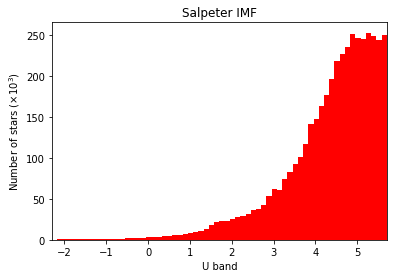

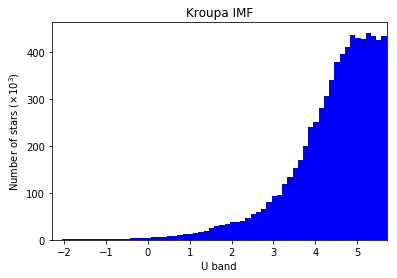

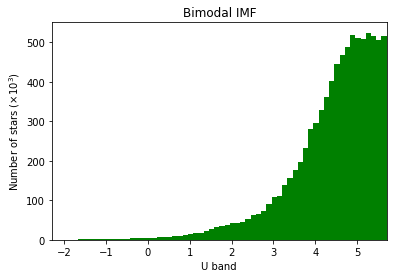

In [16]:
# First the Salpeter IMF
plt.figure(Band+' band histograms (Salpeter)');
plt.title('Salpeter IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Abs_band_axis,im_hist_S*1E-3, width = width,fc = 'r', align='edge');
plt.xlim(Abs_band_limits);
plt.show()

# Second the Kroupa IMF
plt.figure(Band+' band histograms (Kroupa)');
plt.title('Kroupa IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Abs_band_axis,im_hist_K*1E-3, width = width,fc = 'b', align='edge');
plt.xlim(Abs_band_limits);
plt.show()

# Third the Bimodal IMF
plt.figure(Band+' band histograms (Bimodal)');
plt.title('Bimodal IMF');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.bar(Abs_band_axis,im_hist_B*1E-3, width = width,fc = 'g', align='edge');
plt.xlim(Abs_band_limits);
plt.show()

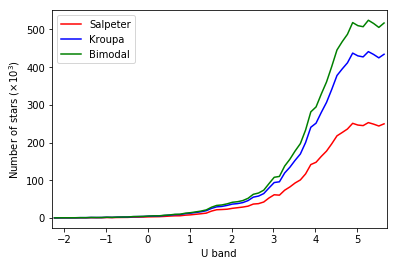

In [17]:
# Comparison
Abs_band_axis = Abs_band_axis + 0.5*width;
plt.figure('Comparison of the absolute '+Band+' band histograms');
plt.xlabel(Band+' band');
plt.ylabel(r'Number of stars ($\times 10^3$)');
plt.plot(Abs_band_axis,im_hist_S*1E-3,'r');
plt.plot(Abs_band_axis,im_hist_K*1E-3,'b');
plt.plot(Abs_band_axis,im_hist_B*1E-3,'g');
plt.xlim(Abs_band_limits);
plt.legend(('Salpeter','Kroupa','Bimodal'));
plt.show()